# COVID_19 (CLEAN DATASET)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("data/covid_19_clean_complete.csv")
data.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


# Meaning of parameters in each columns


1. Province/State: The province or state where the COVID-19 cases were reported.
2. Country/Region: The country or region where the COVID-19 cases were reported.
3. Lat: The latitude (geographical coordinate) of the location.
4. Long: The longitude (geographical coordinate) of the location.
5. Date: The date when the COVID-19 data was reported.
6. Confirmed: The total number of confirmed COVID-19 cases.
7. Deaths: The total number of deaths due to COVID-19.
8. Recovered: The total number of patients who have recovered from COVID-19.
9. Active: The total number of active COVID-19 cases (i.e., cases that are still being treated).
10. WHO Region: The World Health Organization (WHO) region where the country or region is located. The WHO has divided the world into six regions:




# Prepare Data

In [5]:
#check for missing values.
data.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [6]:
# Drop column
data = data.drop("Province/State", axis=1)
data.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [47]:
data.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [7]:
data.duplicated().sum()

0

## Check for outliers using visualization

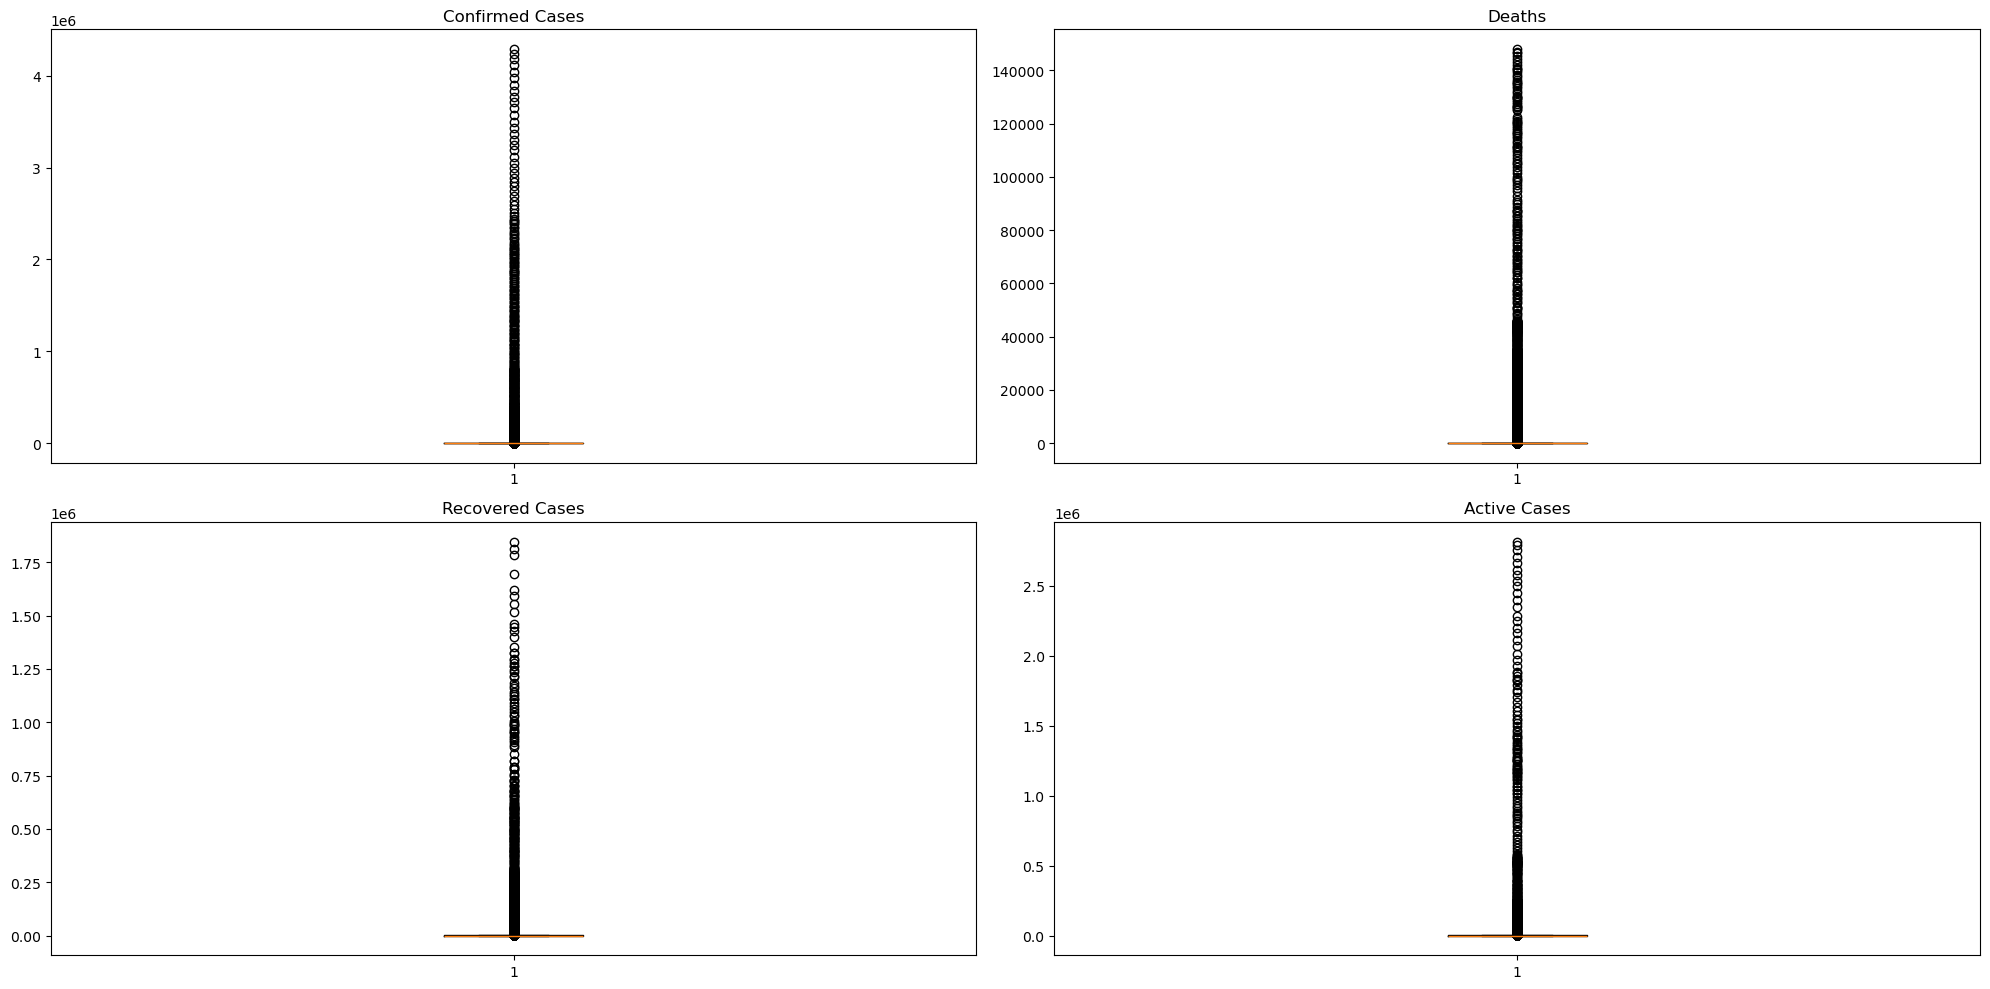

In [8]:


# Using a box plot
# Create box plots for each column
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

axs[0, 0].boxplot(data['Confirmed'])
axs[0, 0].set_title('Confirmed Cases')

axs[0, 1].boxplot(data['Deaths'])
axs[0, 1].set_title('Deaths')

axs[1, 0].boxplot(data['Recovered'])
axs[1, 0].set_title('Recovered Cases')

axs[1, 1].boxplot(data['Active'])
axs[1, 1].set_title('Active Cases')

plt.tight_layout()
plt.show()

## Removing outliers using quantiles

In [28]:
# Calculate low and high values for each column
low_confirmed, high_confirmed = data["Confirmed"].quantile([0.1, 0.9])
low_deaths, high_deaths = data["Deaths"].quantile([0.1, 0.9])
low_recovered, high_recovered = data["Recovered"].quantile([0.1, 0.9])
low_active, high_active = data["Active"].quantile([0.1, 0.9])

# Create masks for each column
mask_confirmed = data["Confirmed"].between(low_confirmed, high_confirmed)
mask_deaths = data["Deaths"].between(low_deaths, high_deaths)
mask_recovered = data["Recovered"].between(low_recovered, high_recovered)
mask_active = data["Active"].between(low_active, high_active)

# Combine masks to remove outliers from all columns
mask = mask_confirmed & mask_deaths & mask_recovered & mask_active

# Apply the mask to the dataframe
data_cleaned = data[mask]

data_cleaned.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


# Exploratory Data Aanalysis

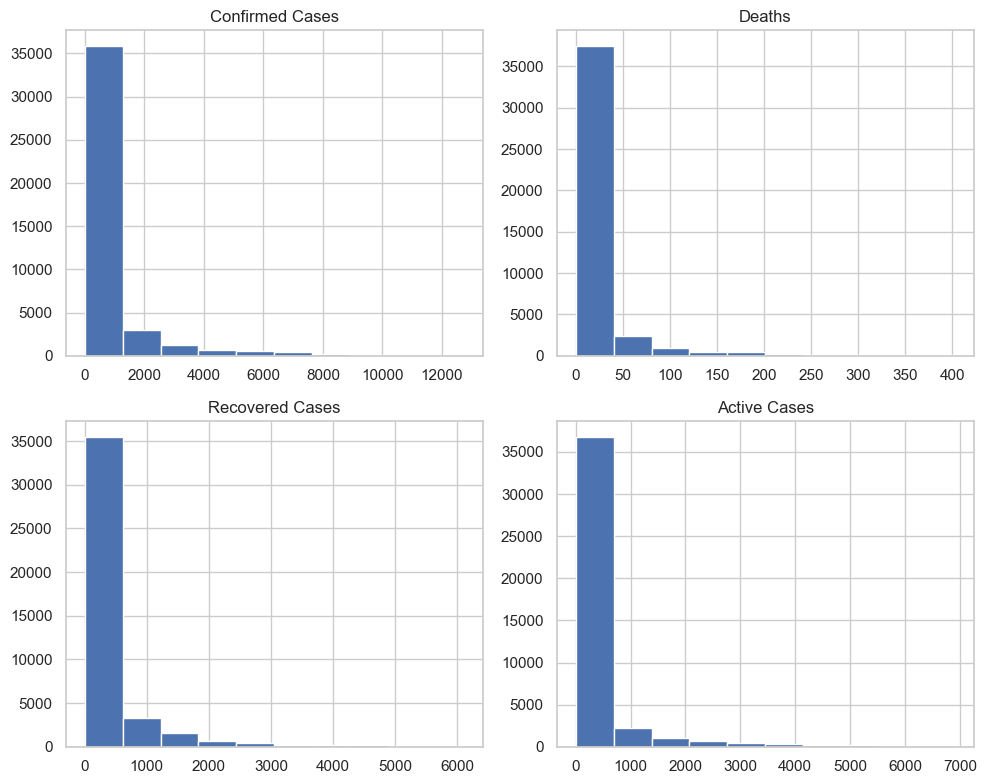

In [29]:
# Create histograms for each column
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].hist(data_cleaned['Confirmed'], bins=10)
axs[0, 0].set_title('Confirmed Cases')

axs[0, 1].hist(data_cleaned['Deaths'], bins=10)
axs[0, 1].set_title('Deaths')

axs[1, 0].hist(data_cleaned['Recovered'], bins=10)
axs[1, 0].set_title('Recovered Cases')

axs[1, 1].hist(data_cleaned['Active'], bins=10)
axs[1, 1].set_title('Active Cases')

plt.tight_layout()
plt.show()

In [30]:
# Group by Country/Region and aggregate the data
country_data = data.groupby('Country/Region').sum().reset_index()

# Sort by the number of confirmed cases
top_confirmed = country_data.sort_values(by='Confirmed', ascending=False).head(10)
top_deaths = country_data.sort_values(by='Deaths', ascending=False).head(10)
top_recovered = country_data.sort_values(by='Recovered', ascending=False).head(10)
top_active = country_data.sort_values(by='Active', ascending=False).head(10)

# Plotting the top 10 countries by confirmed cases
plt.figure(figsize=(12, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=top_confirmed, palette='Reds_r')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country/Region')
plt.show()

# Plotting the top 10 countries by deaths
plt.figure(figsize=(12, 6))
sns.barplot(x='Deaths', y='Country/Region', data=top_deaths, palette='Blues_r')
plt.title('Top 10 Countries by COVID-19 Deaths')
plt.xlabel('Deaths')
plt.ylabel('Country/Region')
plt.show()

# Plotting the top 10 countries by recovered cases
plt.figure(figsize=(12, 6))
sns.barplot(x='Recovered', y='Country/Region', data=top_recovered, palette='Greens_r')
plt.title('Top 10 Countries by Recovered COVID-19 Cases')
plt.xlabel('Recovered Cases')
plt.ylabel('Country/Region')
plt.show()

# Plotting the top 10 countries by active cases
plt.figure(figsize=(12, 6))
sns.barplot(x='Active', y='Country/Region', data=top_active, palette='Oranges_r')
plt.title('Top 10 Countries by Active COVID-19 Cases')
plt.xlabel('Active Cases')
plt.ylabel('Country/Region')
plt.show()

TypeError: datetime64 type does not support sum operations

In [ ]:
# Plot the time series of confirmed, deaths, recovered, and active cases to see how they change over time.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

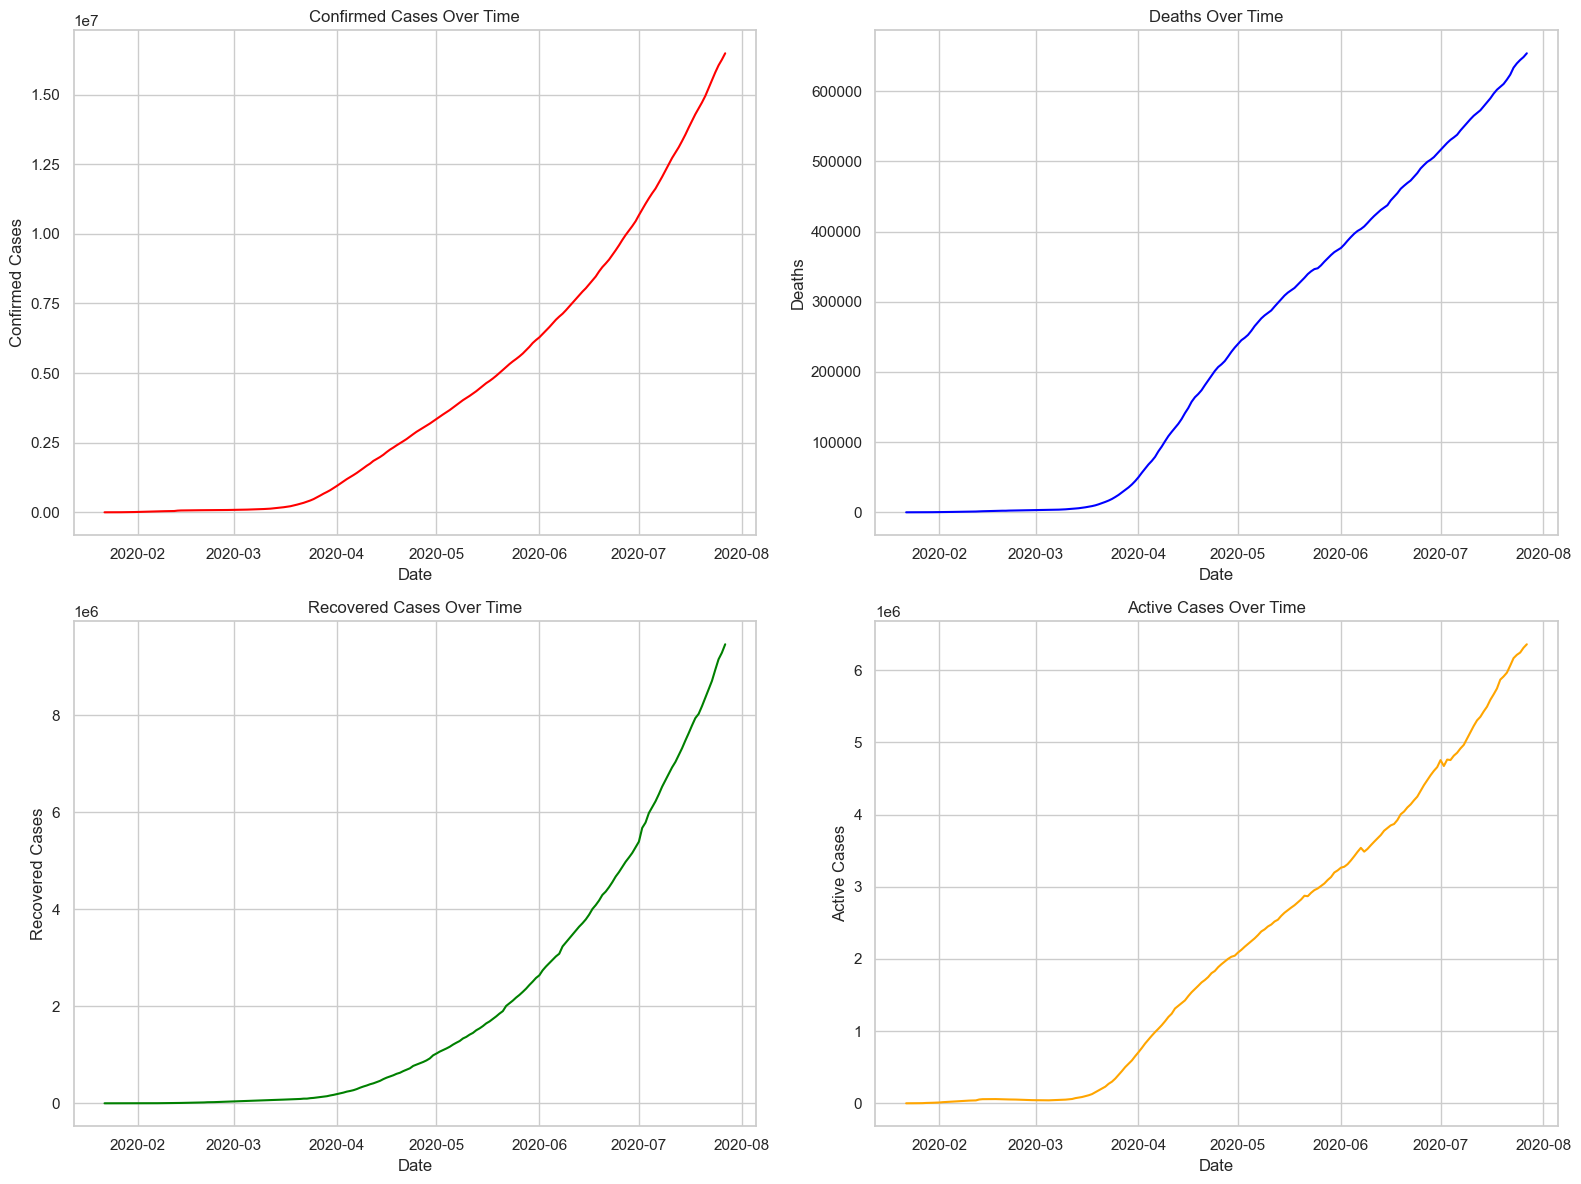

In [14]:
# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Group by Date and sum the cases
time_series_data = data.groupby('Date').sum().reset_index()

# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot confirmed cases over time
sns.lineplot(x='Date', y='Confirmed', data=time_series_data, ax=axs[0, 0], color='red')
axs[0, 0].set_title('Confirmed Cases Over Time')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Confirmed Cases')

# Plot deaths over time
sns.lineplot(x='Date', y='Deaths', data=time_series_data, ax=axs[0, 1], color='blue')
axs[0, 1].set_title('Deaths Over Time')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Deaths')

# Plot recovered cases over time
sns.lineplot(x='Date', y='Recovered', data=time_series_data, ax=axs[1, 0], color='green')
axs[1, 0].set_title('Recovered Cases Over Time')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Recovered Cases')

# Plot active cases over time
sns.lineplot(x='Date', y='Active', data=time_series_data, ax=axs[1, 1], color='orange')
axs[1, 1].set_title('Active Cases Over Time')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Active Cases')

# Improve layout
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

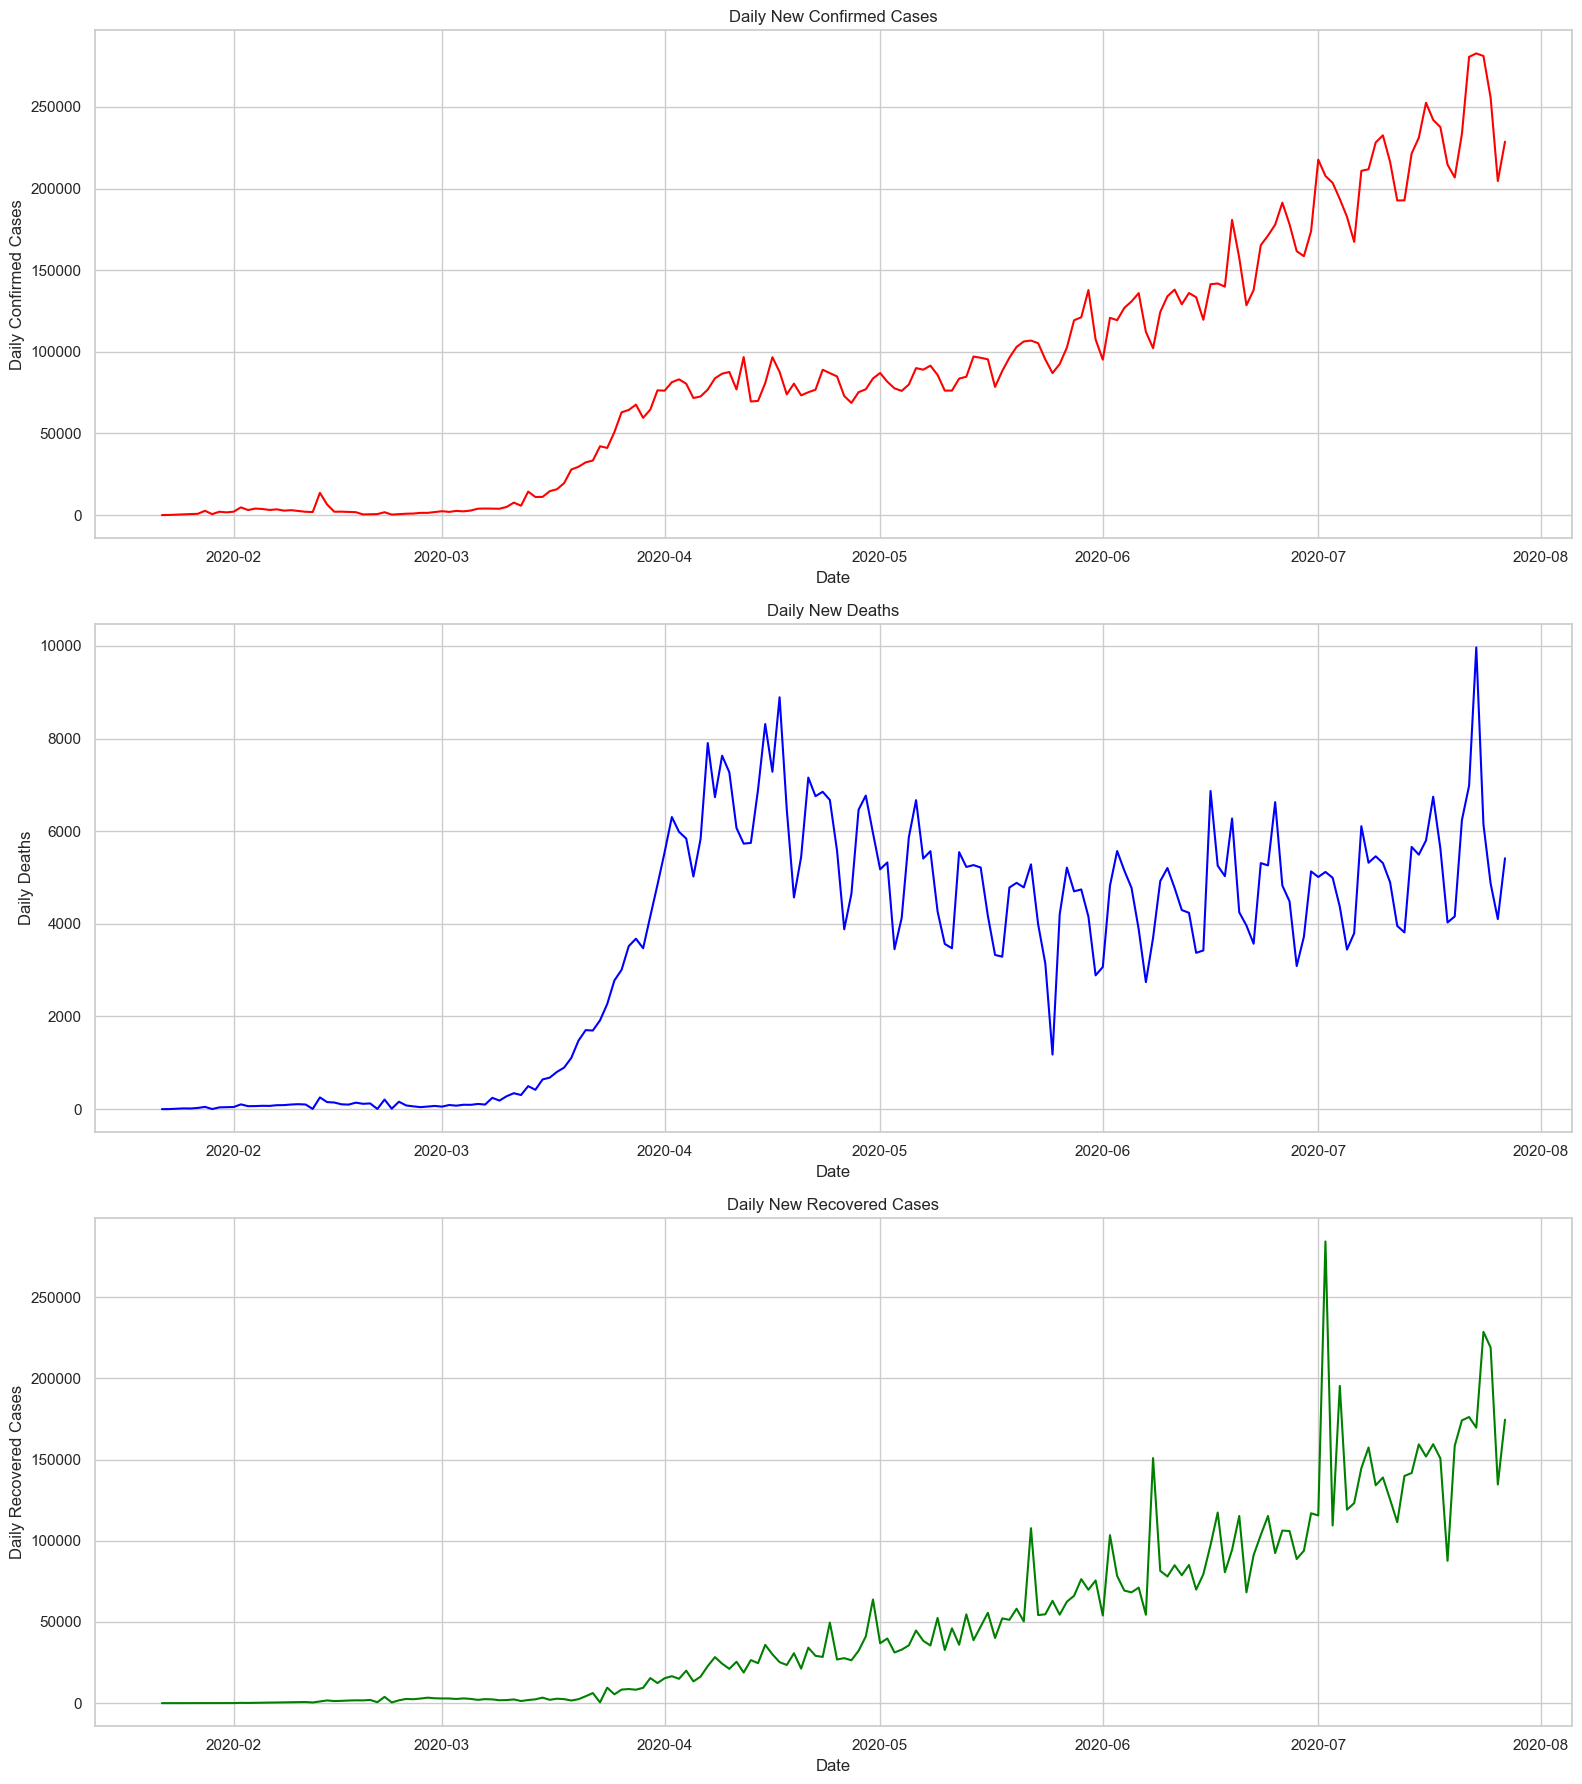

In [15]:
# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Group by Date and sum the cases
time_series_data = data.groupby('Date').sum().reset_index()

# Calculate daily changes
time_series_data['Daily Confirmed'] = time_series_data['Confirmed'].diff().fillna(0)
time_series_data['Daily Deaths'] = time_series_data['Deaths'].diff().fillna(0)
time_series_data['Daily Recovered'] = time_series_data['Recovered'].diff().fillna(0)

# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(16, 18))

# Plot daily new confirmed cases over time
sns.lineplot(x='Date', y='Daily Confirmed', data=time_series_data, ax=axs[0], color='red')
axs[0].set_title('Daily New Confirmed Cases')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Daily Confirmed Cases')

# Plot daily new deaths over time
sns.lineplot(x='Date', y='Daily Deaths', data=time_series_data, ax=axs[1], color='blue')
axs[1].set_title('Daily New Deaths')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Daily Deaths')

# Plot daily new recovered cases over time
sns.lineplot(x='Date', y='Daily Recovered', data=time_series_data, ax=axs[2], color='green')
axs[2].set_title('Daily New Recovered Cases')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Daily Recovered Cases')

# Improve layout
plt.tight_layout()
plt.show()


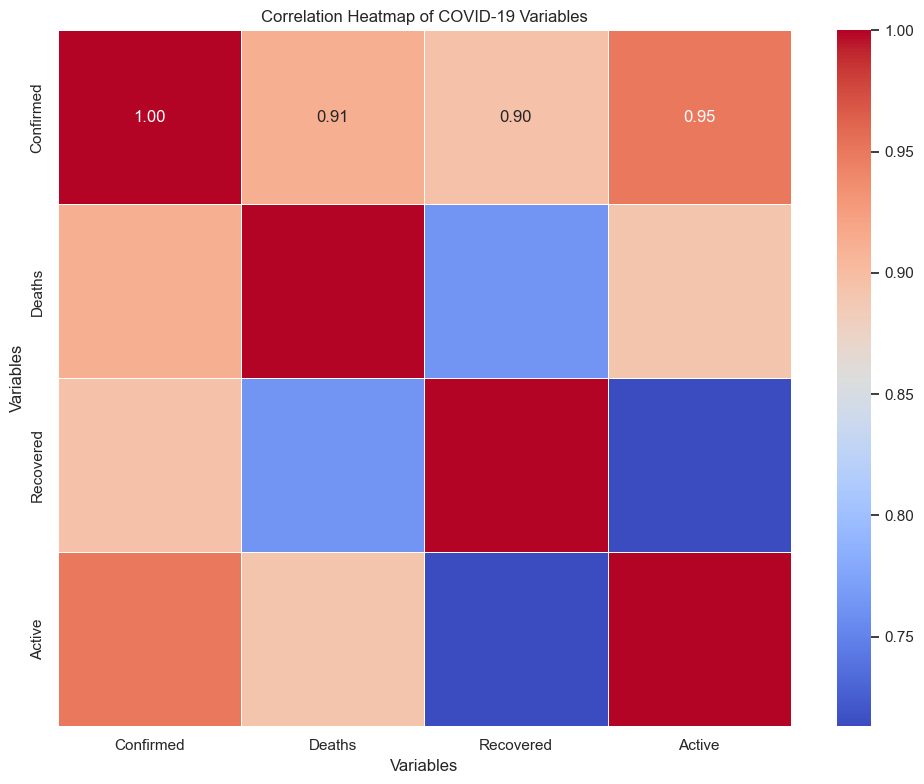

In [20]:
#correlation analysis

# Fill missing values in relevant columns with 0
data.fillna({'Confirmed': 0, 'Deaths': 0, 'Recovered': 0, 'Active': 0}, inplace=True)

# Calculate the correlation matrix
correlation_matrix = data[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()

# Set plot style
sns.set(style="whitegrid")

# Create the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap of COVID-19 Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
Compare the spread and impact of COVID-19 across different WHO regions.

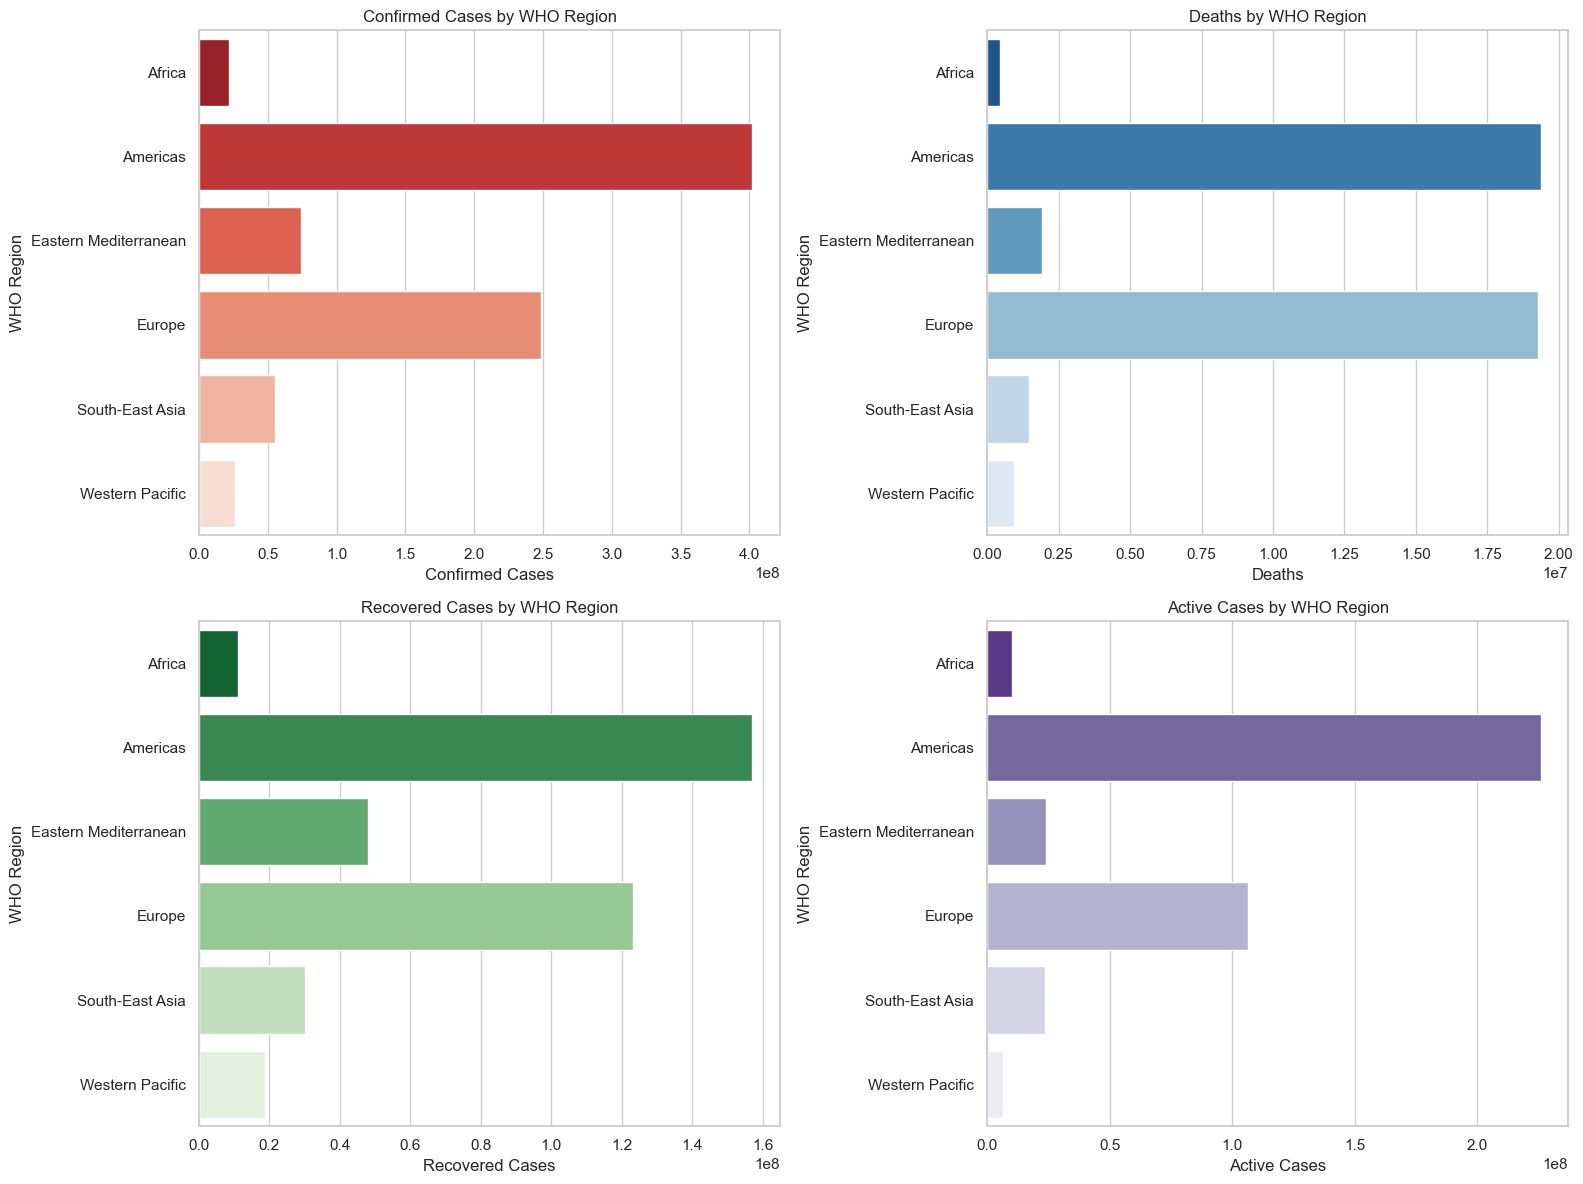

In [21]:
# Fill missing values in relevant columns with 0
data.fillna({'Confirmed': 0, 'Deaths': 0, 'Recovered': 0, 'Active': 0}, inplace=True)

# Group by WHO Region and sum the cases
region_data = data.groupby('WHO Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Bar plot for confirmed cases by WHO Region
sns.barplot(x='Confirmed', y='WHO Region', data=region_data, ax=axs[0, 0], palette='Reds_r')
axs[0, 0].set_title('Confirmed Cases by WHO Region')
axs[0, 0].set_xlabel('Confirmed Cases')
axs[0, 0].set_ylabel('WHO Region')

# Bar plot for deaths by WHO Region
sns.barplot(x='Deaths', y='WHO Region', data=region_data, ax=axs[0, 1], palette='Blues_r')
axs[0, 1].set_title('Deaths by WHO Region')
axs[0, 1].set_xlabel('Deaths')
axs[0, 1].set_ylabel('WHO Region')

# Bar plot for recovered cases by WHO Region
sns.barplot(x='Recovered', y='WHO Region', data=region_data, ax=axs[1, 0], palette='Greens_r')
axs[1, 0].set_title('Recovered Cases by WHO Region')
axs[1, 0].set_xlabel('Recovered Cases')
axs[1, 0].set_ylabel('WHO Region')

# Bar plot for active cases by WHO Region
sns.barplot(x='Active', y='WHO Region', data=region_data, ax=axs[1, 1], palette='Purples_r')
axs[1, 1].set_title('Active Cases by WHO Region')
axs[1, 1].set_xlabel('Active Cases')
axs[1, 1].set_ylabel('WHO Region')

# Improve layout
plt.tight_layout()
plt.show()

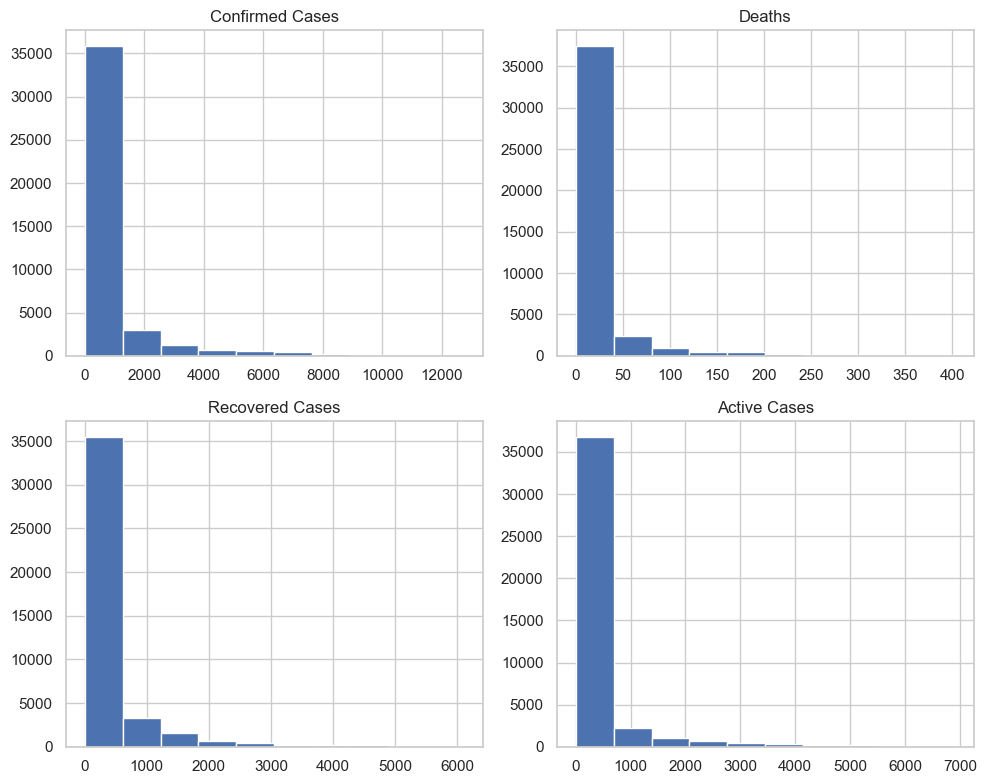

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


# Create histograms for each column
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].hist(data_cleaned['Confirmed'], bins=10)
axs[0, 0].set_title('Confirmed Cases')

axs[0, 1].hist(data_cleaned['Deaths'], bins=10)
axs[0, 1].set_title('Deaths')

axs[1, 0].hist(data_cleaned['Recovered'], bins=10)
axs[1, 0].set_title('Recovered Cases')

axs[1, 1].hist(data_cleaned['Active'], bins=10)
axs[1, 1].set_title('Active Cases')

plt.tight_layout()
plt.show()